In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Задача: Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

*Mobile Games AB Testing with Cookie Cats*

Для начала загрузим данные и приведем их в порядок (удалим дубли, пустые значения и т.д.)

In [30]:
data = pd.read_csv("C:/Users/MUVKA/Downloads/Cats/cookie_cats.csv")

In [31]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [33]:
# Поиск дублирующихся значений

data.userid.duplicated().sum()

0

In [34]:
# Проверка пустых значений

data.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

#### Для проведения А/В тестирования у нас есть следующие данные:

<ul>
<li><code>userid</code> - уникальный идентификатор пользователя</li>
<li><code>version</code> - контрольная группа пользователя ("ворота" на уровене 30/ не уровене 40)</li>
<li><code>sum_gamerounds</code> - количество раундов, сыгранных пользователем за первые 14 дней после установки</li>
<li><code>retention_1</code> - играл ли пользователь через 1 день после установки</li>
<li><code>retention_7</code> - играл ли пользователь через 7 дней после установки</li>
</ul>

Что мы можем проанализировать:
* Количество сыгранных раундов к количеству игроков за две недели.
* Процент пользователей, вернувшихся в игру на следующий день (по группам).
* Процент пользователей, вернувшихся в игру через неделю (по группам).

В результате мы должны определить, в какой тестовой группе (30/40) больше процент возвращения и удержания пользователей.

In [35]:
# Группировка пользователей по уровню преграды (30/40)

data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [36]:
# Посчитаем кол-во пользователей для каждого раунда

round_df = data.groupby(by='sum_gamerounds')['userid'].count()
round_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

Text(0, 0.5, 'Пользователи')

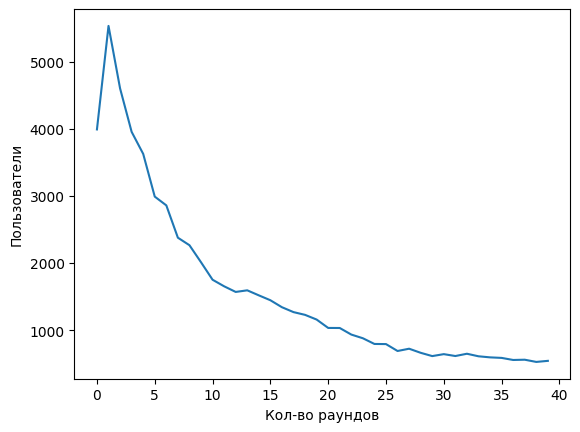

In [37]:
# Посмотрим распределение на графике для первых 40 уровней

ax = round_df.head(40).plot(x='sum_gamerounds', y='userid')
ax.set_xlabel("Кол-во раундов")
ax.set_ylabel("Пользователи")

На графике видно, что чем больше номер раунда, тем меньше пользователей, которые проходили этот раунд.

Теперь посмотрим процент удержанных пользователей на первый день после установки игры. 


In [38]:
# Процент пользователей, вернувшихся в игру на следующий день

data['retention_1'].sum() / data['retention_1'].count()

0.4452095044850259

Видим, что процент вернувшихся игроков меньше половины. Посмотрим, есть ли отличия в данных в рамках отдельных групп.

In [39]:
data.groupby('version')['retention_1'].sum() / data.groupby('version')['retention_1'].count()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

Получаем 44.8% для 30-го уровня и 44.2% для 40-го.
Отличие есть, но оно всего 0,6%, что нельзя считать критичным. Посмотрим на сколько изменится значения за недельный период.


In [40]:
data.groupby('version')['retention_7'].sum() / data.groupby('version')['retention_7'].count()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

За неделю процент вернувшихся пользователей, дошедших до 40-го уровня уже стал ниже, чем у пользователей на 30-уровне и составил 0.8%. Но не смотря на это, не стоит забывать, что количество пользователей на 40-ом уровне ниже, чем на 30-ом.

### Вывод

Проанализировав данные, мы получили следующие результаты:

* С каждым уровнем количество игроков уменьшается.
* Процент удержания на следующий день выше в группе с преградой на 30-ом уровне.
* Процент удержания через неделю выше в группе с преградой на 30-ом уровне.

Следовательно стоит оставить "ворота" на уровне 30. Тогда процент вернувшихся игроков будет выше. Также данные показывают, что до 30 уровня доходит больше игроков, не успевая устать от игры, что повышает шанс их возвращения.